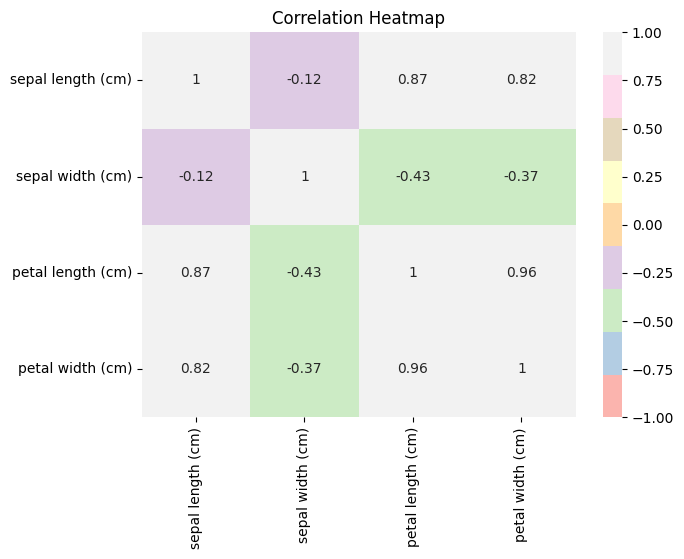

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame   # DataFrame includes features + target

# Correlation heatmap
corr = df.drop(columns=["target"]).corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="Pastel1", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()



In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

df_cleaned = df.dropna()
print("Original shape:", df.shape)
print("After dropping NaNs:", df_cleaned.shape)
print(df_cleaned.head())


Original shape: (150, 5)
After dropping NaNs: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

df_cleaned = df.dropna(how="all")
print("Original shape:", df.shape)
print("After dropping rows with all NaN:", df_cleaned.shape)


Original shape: (150, 5)
After dropping rows with all NaN: (150, 5)


In [5]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

df_cleaned = df.dropna(axis=1, how="any")
print("Original columns:", df.columns.tolist())
print("Remaining columns after drop:", df_cleaned.columns.tolist())


Original columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Remaining columns after drop: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


In [6]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame

df_cleaned = df.dropna()
df_cleaned.to_csv("iris_cleaned.csv", index=False)
print("Original shape:", df.shape)
print("After dropping rows with missing values:", df_cleaned.shape)


Original shape: (150, 5)
After dropping rows with missing values: (150, 5)


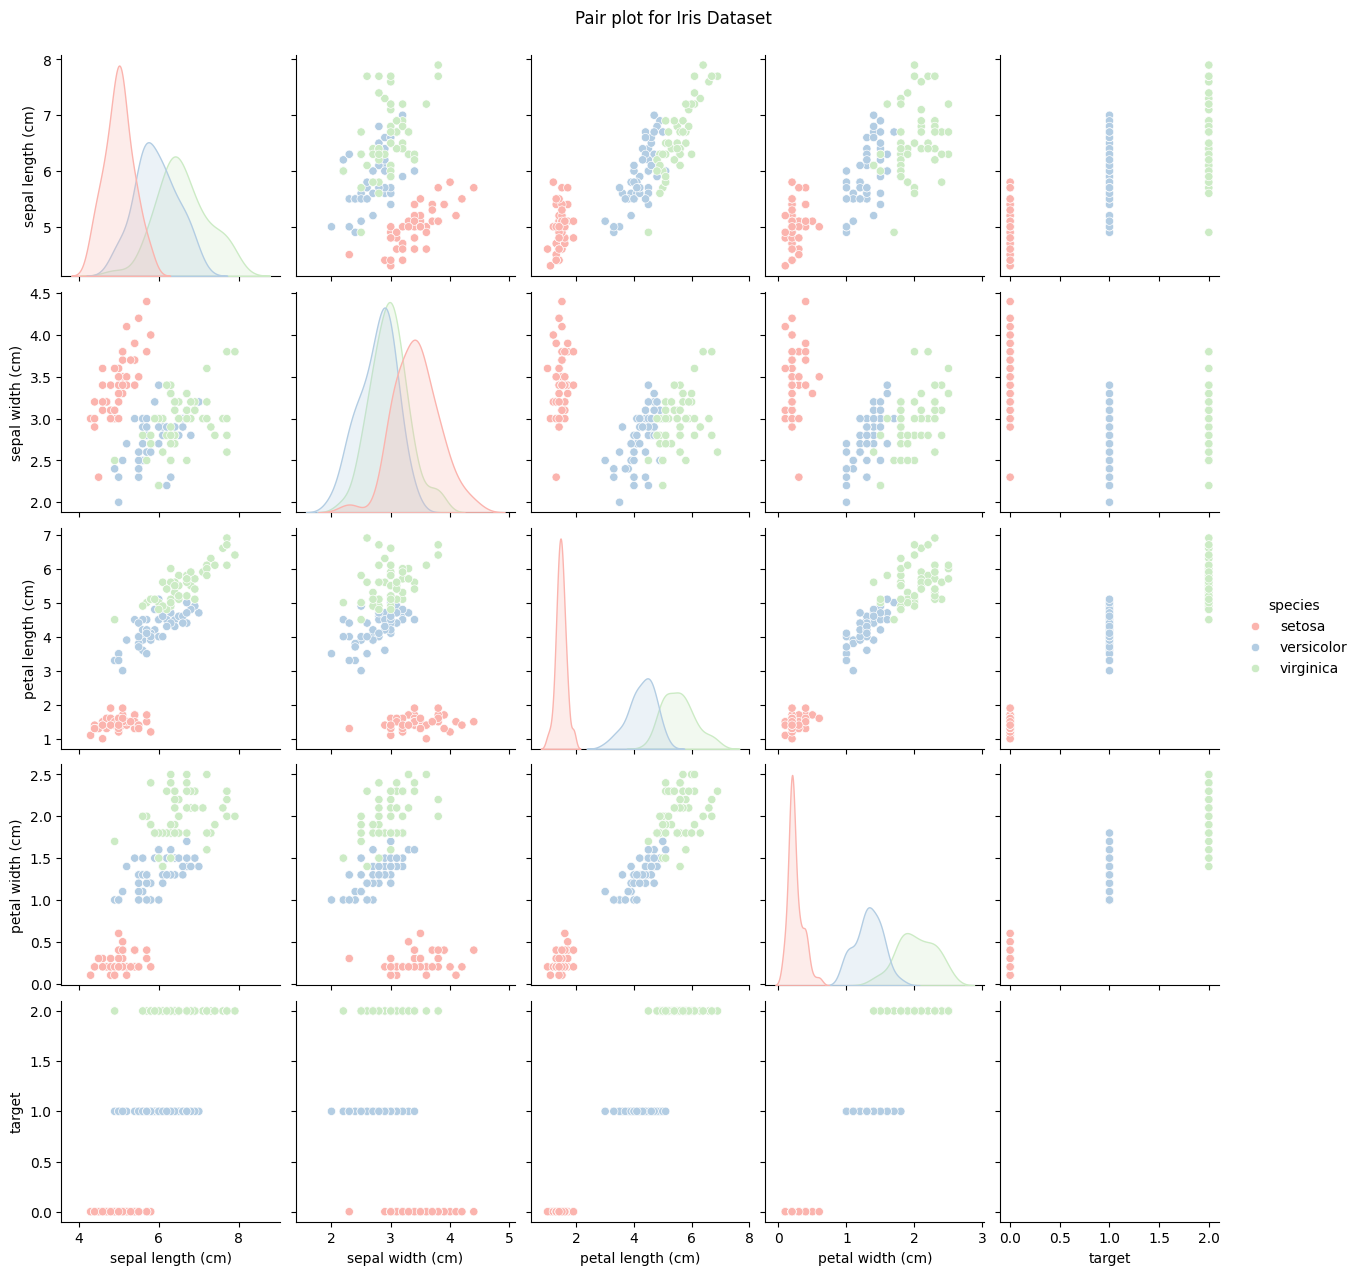

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True)
df = iris.frame
df["species"] = df["target"].map(lambda x: iris.target_names[x])  # add species names

sns.set_palette("Pastel1")
pair = sns.pairplot(df, hue="species")
pair.fig.suptitle("Pair plot for Iris Dataset", y=1.02)
plt.show()


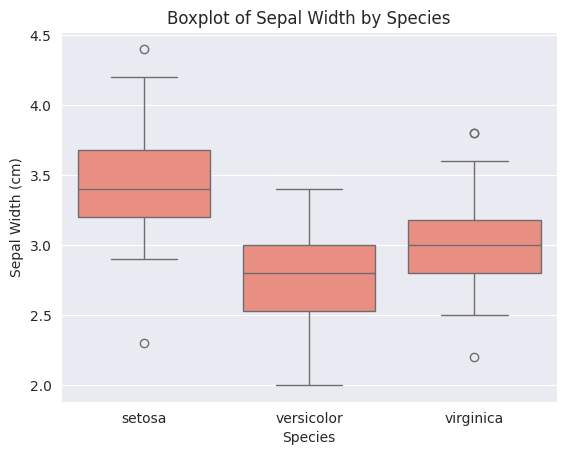

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="species", y="sepal width (cm)", data=df, color="salmon")
plt.title("Boxplot of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()



In [14]:
import pandas as pd
import numpy as np

# Create a dictionary with missing values
d = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# Convert to DataFrame
df_missing = pd.DataFrame(d)

# Detect missing values
mv = df_missing.isnull()
print("Missing values (True means NaN):\n", mv)


Missing values (True means NaN):
    First Score  Second Score  Third Score
0        False         False         True
1        False         False        False
2         True         False        False
3        False          True        False


In [15]:
# Check where values are NOT missing
nmv = df_missing.notnull()
print("Non-missing values (True means value exists):\n", nmv)


Non-missing values (True means value exists):
    First Score  Second Score  Third Score
0         True          True        False
1         True          True         True
2        False          True         True
3         True         False         True


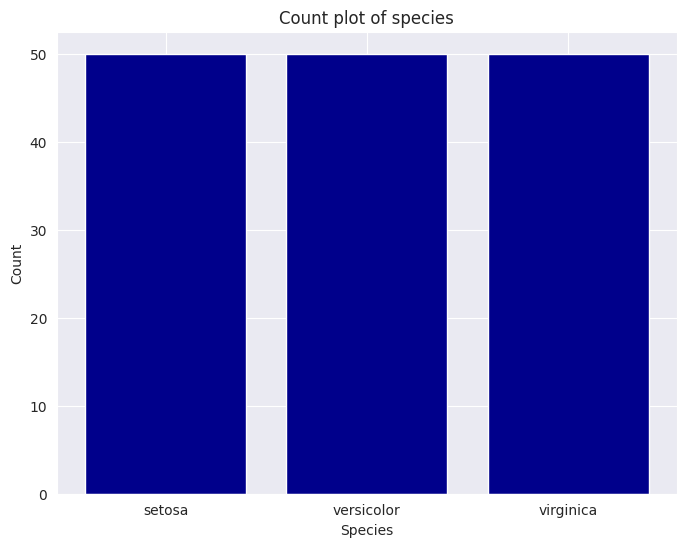

In [16]:
species_counts = df["species"].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(species_counts.index, species_counts.values, color="darkblue")
plt.title("Count plot of species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


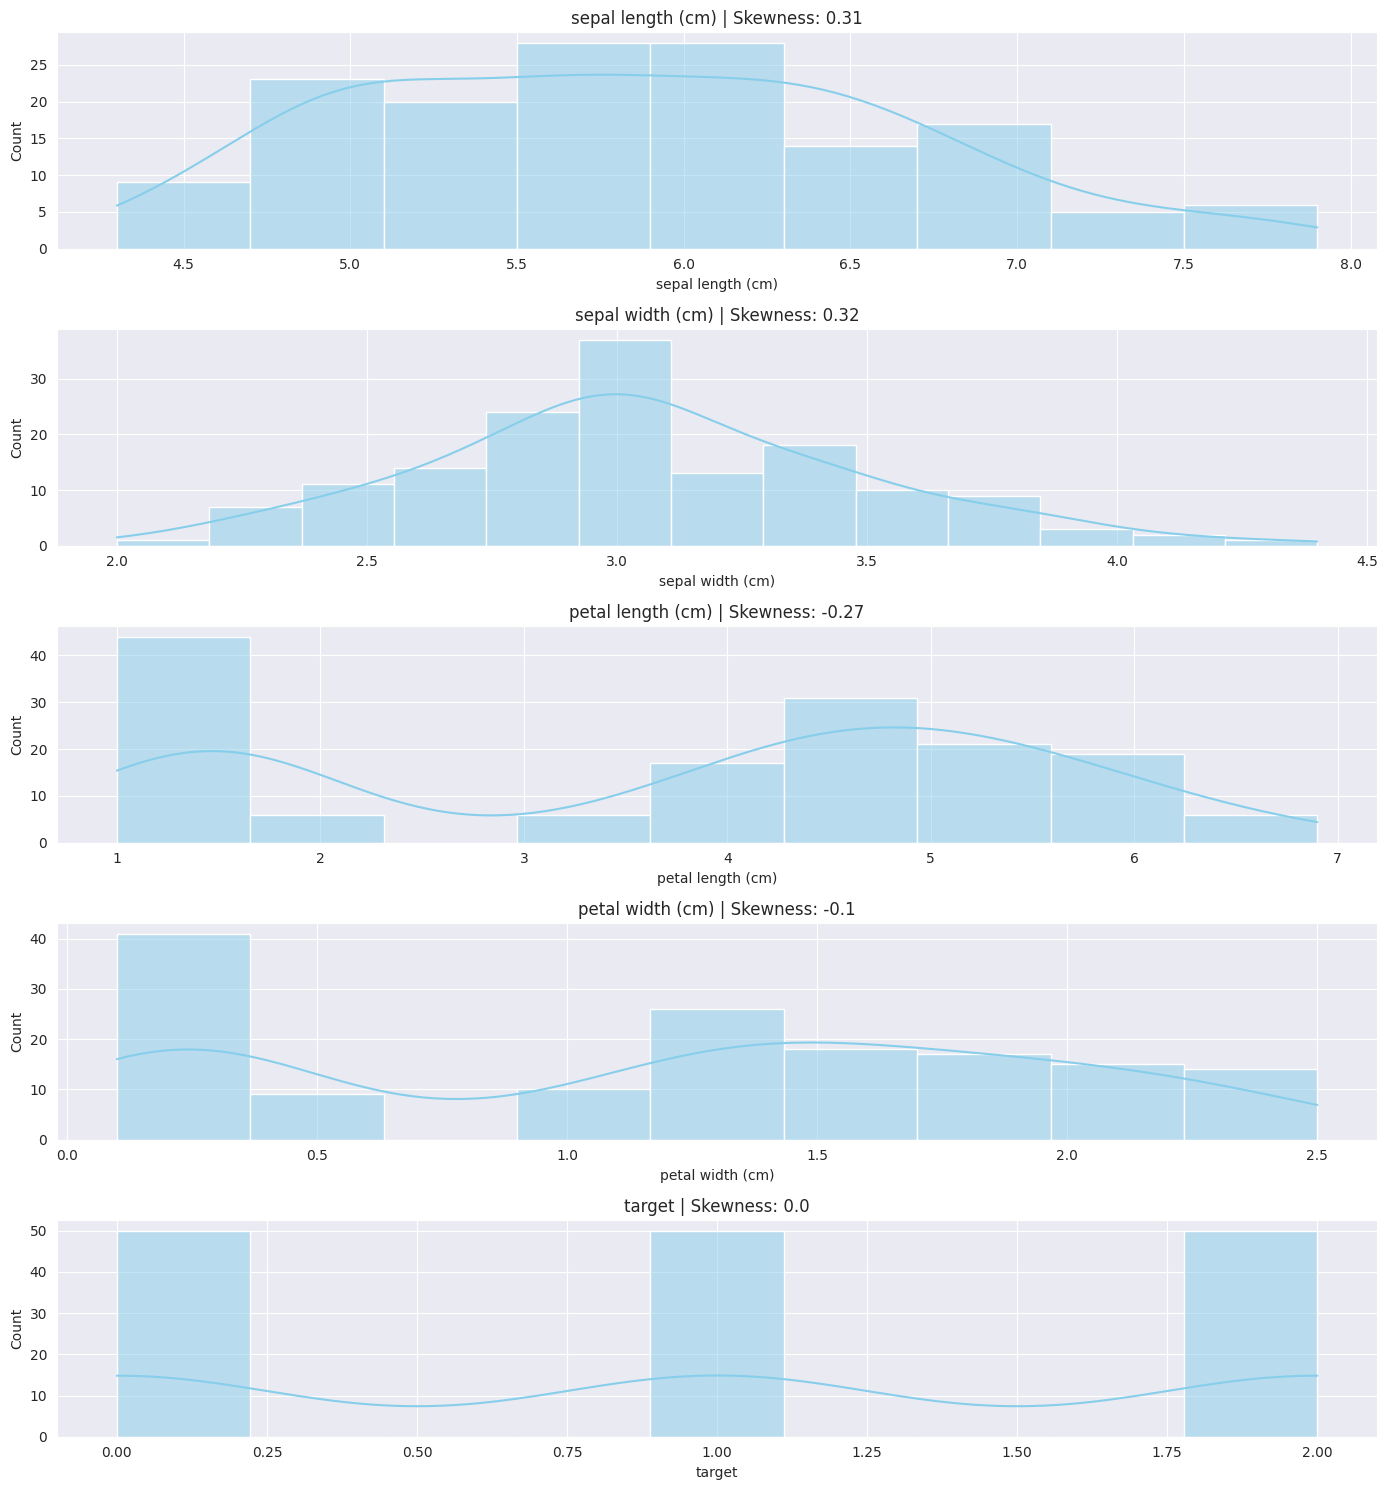

In [17]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    sns.histplot(df[feature], kde=True, color="skyblue")
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()
